# **Convolutional Neural Network (CNN - Part 2)**

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


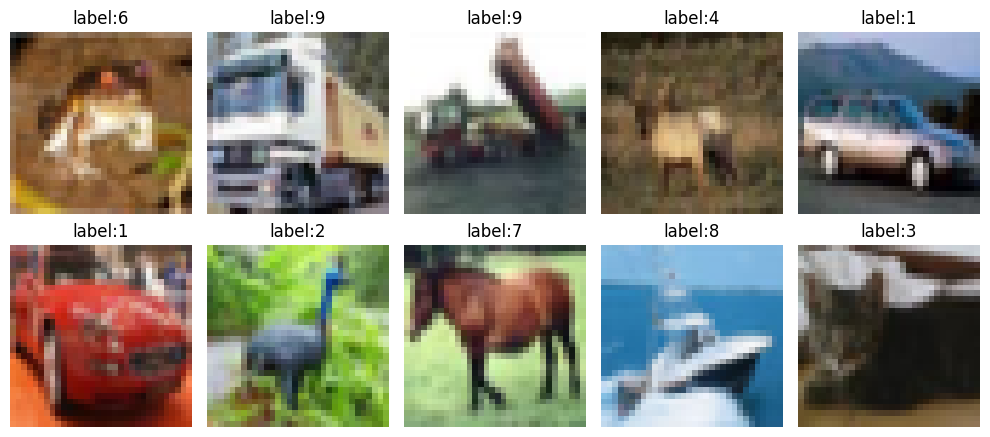

In [9]:
fig, axes  =plt.subplots(2, 5, figsize = (10, 5))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i])
  ax.set_title(f'label:{y_train[i][0]}')
  ax.axis('off')

  plt.tight_layout()
plt.show()


In [10]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

## **Training without Dropout Layer**

In [13]:
model = Sequential()
model.add(InputLayer(input_shape = (32, 32, 3)))
model.add(Conv2D(25, (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 25)          │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         640,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,010 (2.45 MB)

 Trainable params: 643,010 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.2658 - loss: 4.9879 - val_accuracy: 0.3855 - val_loss: 1.6871
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4022 - loss: 1.6591 - val_accuracy: 0.4329 - val_loss: 1.5766
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4672 - loss: 1.4972 - val_accuracy: 0.4686 - val_loss: 1.5291
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5084 - loss: 1.3855 - val_accuracy: 0.4463 - val_loss: 1.6115
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5472 - loss: 1.2899 - val_accuracy: 0.4936 - val_loss: 1.4823
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5791 - loss: 1.2046 - val_accuracy: 0.4737 - val_loss: 1.6137
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6046 - loss: 1.1495 - val_accuracy: 0.5019 - val_loss: 1.5752
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6227 - loss: 1.087

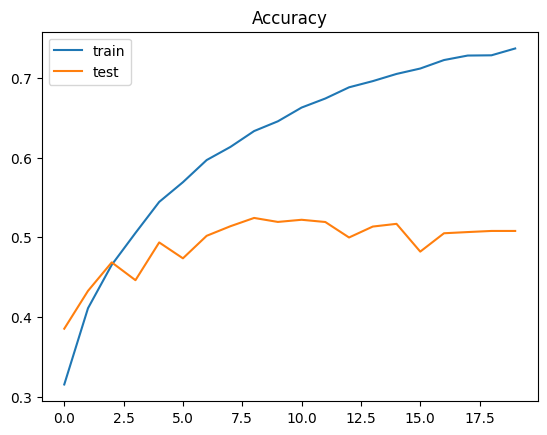

In [16]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

## **Training using Dropout layer**

In [17]:
model = Sequential()
model.add(InputLayer(input_shape = (32, 32, 3)))
model.add(Conv2D(25, (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 25)          │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         640,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,010 (2.45 MB)

 Trainable params: 643,010 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1954 - loss: 5.6046 - val_accuracy: 0.3289 - val_loss: 1.7919
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3200 - loss: 1.8161 - val_accuracy: 0.4084 - val_loss: 1.6409
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3549 - loss: 1.7271 - val_accuracy: 0.4057 - val_loss: 1.6310
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3826 - loss: 1.6658 - val_accuracy: 0.4482 - val_loss: 1.5408
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4033 - loss: 1.6208 - val_accuracy: 0.4368 - val_loss: 1.5595
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4203 - loss: 1.5672 - val_accuracy: 0.4514 - val_loss: 1.4900
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4346 - loss: 1.5352 - val_accuracy: 0.4384 - val_loss: 1.5331
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4397 - loss: 1.51

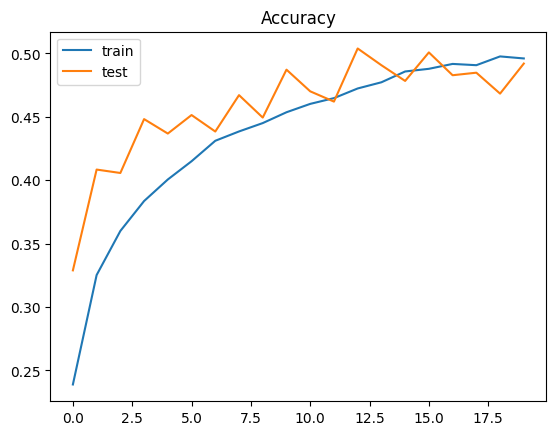

In [19]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

##**Task increase accuracy test/train 90%+**
## **Complexing the model by adding more convolutional layers and maxpooling layers**

In [38]:
from keras.optimizers import Adam
from keras.regularizers import l2

model = Sequential()
model.add(InputLayer(input_shape = (32, 32, 3)))
model.add(Conv2D(32, (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', strides = (1,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.20))
model.add(Dense(units = 10, activation = 'softmax'))

optimizer = Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,426 (1.05 MB)

 Trainable params: 276,426 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 30, validation_data = (X_test, y_test))

Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.2694 - loss: 2.9802 - val_accuracy: 0.4588 - val_loss: 1.6079
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.4383 - loss: 1.6431 - val_accuracy: 0.4891 - val_loss: 1.5132
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4923 - loss: 1.4890 - val_accuracy: 0.5503 - val_loss: 1.3371
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5355 - loss: 1.3683 - val_accuracy: 0.5721 - val_loss: 1.2965
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5703 - loss: 1.2964 - val_accuracy: 0.5988 - val_loss: 1.2264
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6058 - loss: 1.2082 - val_accuracy: 0.5940 - val_loss: 1.2281
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6186 - loss: 1.1809 - val_accuracy: 0.6285 - val_loss: 1.1621
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6349 - loss: 1.128

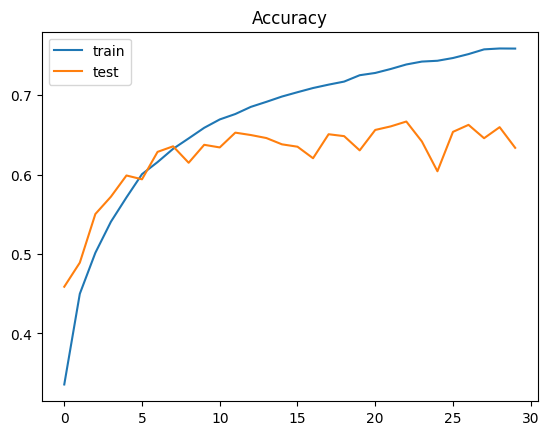

In [40]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

## **Data Augumentation**

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
image_path = '/content/dog.jpeg'

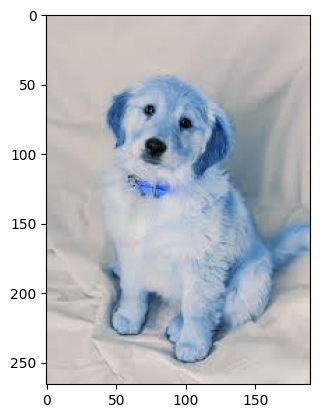

In [50]:
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(img)

In [47]:
image = np.expand_dims(img, 0)

In [49]:
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.3, zoom_range = 0.2 )

In [51]:
i = 0
for batch in datagen.flow(image, save_to_dir='/content/preview', save_format='jpeg', save_prefix='dog'):
  i+=1
  if i>9:
    break

## **Task:** **Perform Data augmentation using different variations**

In [53]:
import matplotlib.pyplot as plt
import keras
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
img_path = '/content/cat.jpeg'

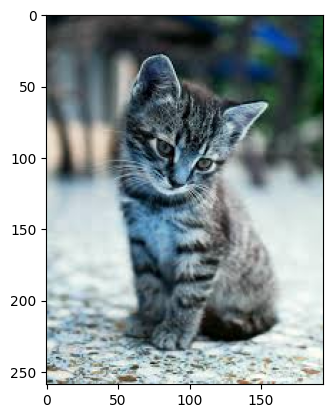

In [55]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(img)

In [56]:
image = np.expand_dims(img, 0)

In [57]:
datagen1 = ImageDataGenerator(rotation_range = 40, width_shift_range= 0.2, height_shift_range = 0.3, zoom_range = 0.2, fill_mode = 'nearest', horizontal_flip = True, vertical_flip = True, shear_range = 0.2, channel_shift_range=0.3, brightness_range=[0.5, 1.5])

In [58]:
i = 0
for batch in datagen1.flow(image, save_to_dir='/content/Task_img_gen', save_format='jpeg', save_prefix = 'cat'):
  i+=1
  if i>19:
    break